# Weighted ECM clustering vs Traditional ECM clustering
## With Seeds dataset


In [1]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
from evclust.utils import plotting, display_results_fuzzy_partition, display_results_evidential, ev_plot_2D
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
from evclust.datasets import load_seeds

from evclust.ecm import ecm
from evclust.wecm_new_barycenter import wecm
from evclust.fcm.fcm_keller2000 import fcm as fcm_keller2000
from evclust.fcm.fcm_wang2004 import fcm as fcm_wang2004
from evclust.fcm.fcm_frigui2004 import scad1
from evclust.fcm.fcm_frigui2004 import scad2
from evclust.fcm.ifwfcm_xing2014 import fcm as ifwfcm_xing2014
from evclust.fcm.ifwfcm_kd_xing2014 import fcm as ifwfcm_kd_xing2014


Instances 210 - Features 6 - Class 3
      A     B    D    E    F    G
0  15.0  15.0  6.0  3.0  2.0  5.0
1  15.0  15.0  6.0  3.0  1.0  5.0
2  14.0  14.0  5.0  3.0  3.0  5.0
3  14.0  14.0  5.0  3.0  2.0  5.0
4  16.0  15.0  6.0  4.0  1.0  5.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


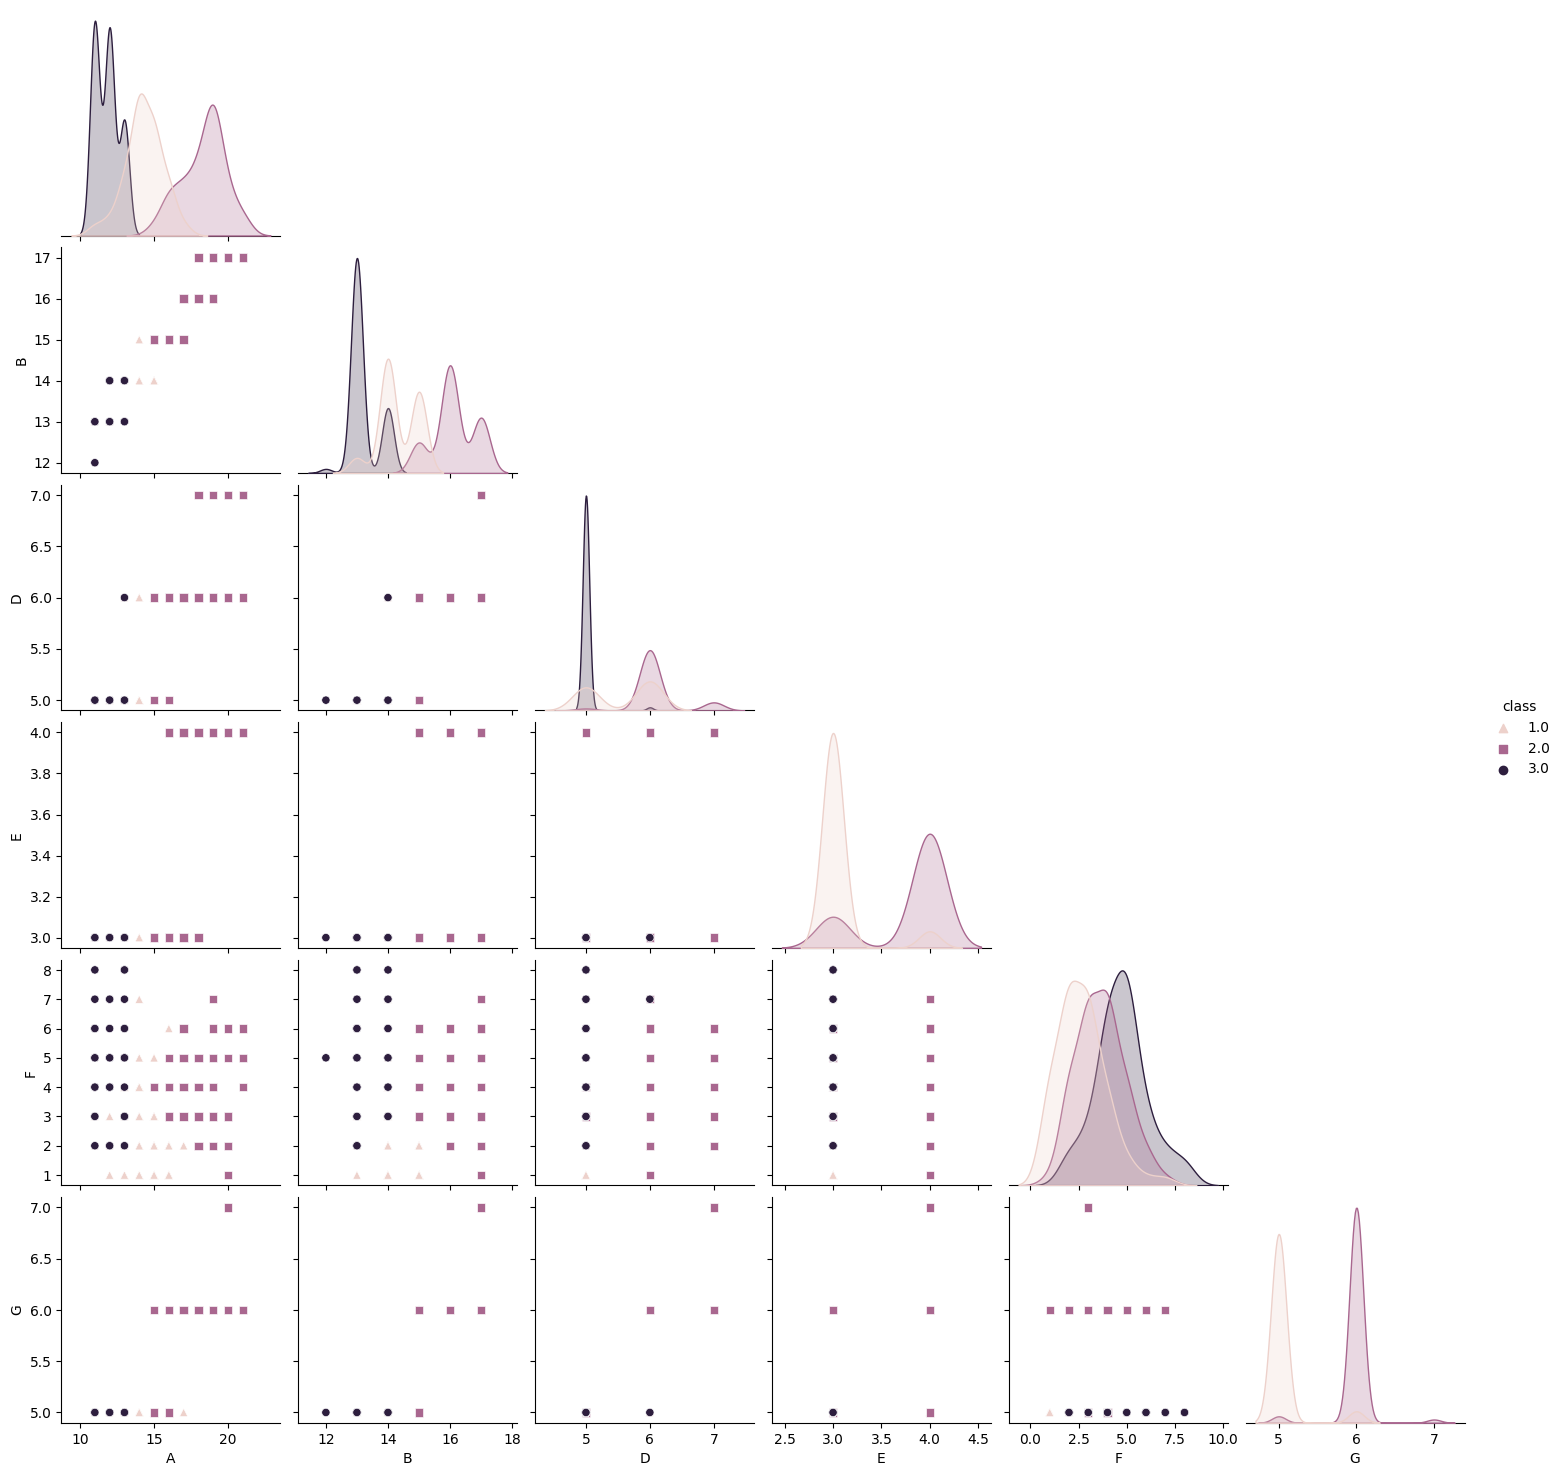

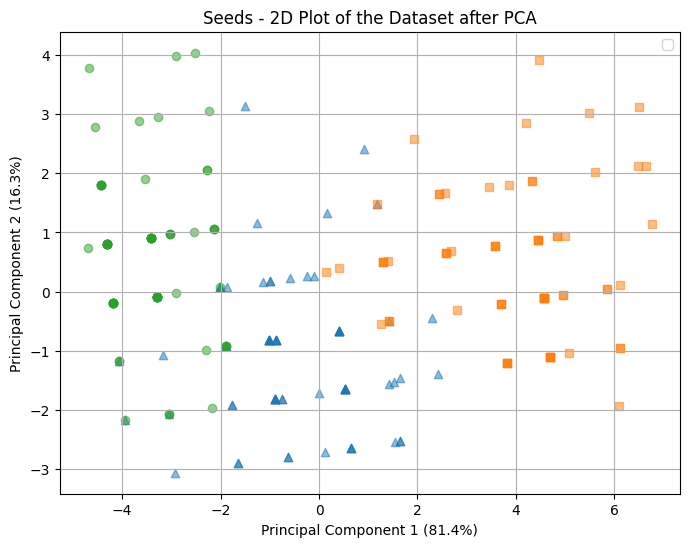

In [2]:
# fetch dataset
df = load_seeds()
df = df.drop(columns=['C'])  # all value equal 1
# data (as pandas dataframes)
y = pd.DataFrame(df.iloc[:, -1])
X = df.iloc[:, :-1]
c = 3

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])

markers = ['^', 's', 'o']
plotting(X, y, ds_name="Seeds", matrix_plot=True, markers=markers)

# Normalization
scaler = MinMaxScaler((0, 1))
X = pd.DataFrame(scaler.fit_transform(X))

## Traditional ECM

In [33]:
%%capture
# Traditional ECM clustering
delta = np.sqrt(20)
ecm_models = np.array([])
for i in range(10):
    model = ecm(x=X, c=c, beta=2, alpha=1, delta=delta, init="None", epsi=1e-5)
    ecm_models = np.append(ecm_models, model)

ecm_models = sorted(ecm_models, key=lambda x: x['crit'])

J values: [10.650773680455146, 10.650774356416274, 10.650774504742593, 10.650776433032531, 10.650776523418395, 10.650776712937404, 10.650776942492689, 10.65077807655956, 10.650778782561018, 10.650779244930897]
ARI values: [0.48551989606890245, 0.48551989606890245, 0.48551989606890245, 0.48551989606890245, 0.48551989606890245, 0.48551989606890245, 0.48551989606890245, 0.48551989606890245, 0.48551989606890245, 0.48551989606890245]
NS values: [1.1259307326154582, 1.1447978736397573, 1.1447924782364924, 0.9355348516844202, 1.1265141592067052, 1.0904274856805014, 1.1447610305327707, 0.9904980669470609, 1.1258439274186418, 1.1447542335178533]
NMI values: [0.5240112233426186, 0.5240112233426186, 0.5240112233426186, 0.5240112233426186, 0.5240112233426186, 0.5240112233426186, 0.5240112233426186, 0.5240112233426186, 0.5240112233426186, 0.5240112233426186]


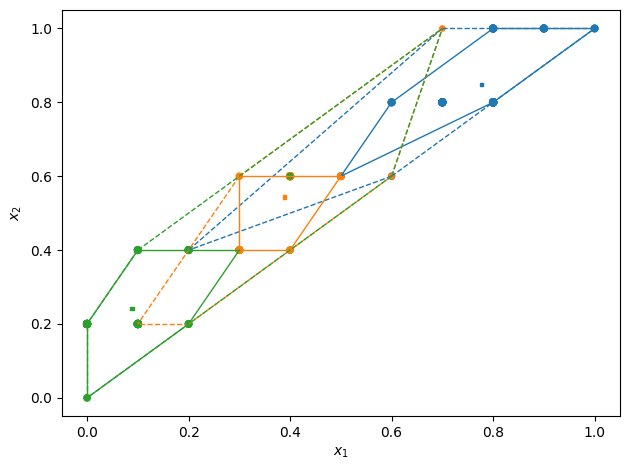

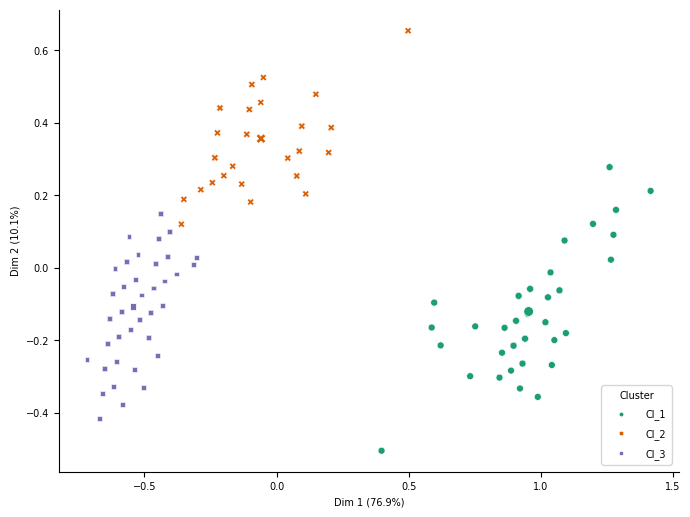

In [34]:
display_results_evidential(X, ecm_models, numeric_labels)

## Weighted ECM (WECM)

In [ ]:
%%capture
wecm_models = np.array([])
d = X.shape[1]
delta = np.sqrt(20)
for i in range(10):
    model = wecm(x=X, c=c, beta=2, alpha=1, delta=delta, init="None", epsilon=1e-7)
    wecm_models = np.append(wecm_models, model)

wecm_models = sorted(wecm_models, key=lambda model: model['crit'])

J values: [3.626788144078528e-28, 7.247659566718047e-28, 1.0871489350117523e-27, 1.4507859161654703e-27, 2.5628414928791314e-27, 3.1505688846012678e-27, 8.660007477259373e-26, 2.8986625364983326e-20, 6.296974747336994e-19, 4.756962430528092e-10]
ARI values: [0.5067839683309697, 0.31286729955204867, 0.31286729955204867, 0.37562887196175815, 0.4354679248089005, 0.46084002862914786, 0.37562887196175815, 0.5020571148398068, 0.5020571148398068, 0.45038856001364225]
NS values: [0.36666667601543645, 0.2857142867831216, 0.7189867545625818, 0.9619047619047619, 0.7157015132046927, 0.6948672525823424, 0.5238095039606675, 1.0135385939434391, 0.34304565256533853, 0.5549545480095841]
NMI values: [0.5867834565097816, 0.39991402258714354, 0.39991402258714354, 0.4298337634385978, 0.5297886979701691, 0.5684381718845214, 0.4298337634385978, 0.596539492396706, 0.5965394923967061, 0.551979382173585]


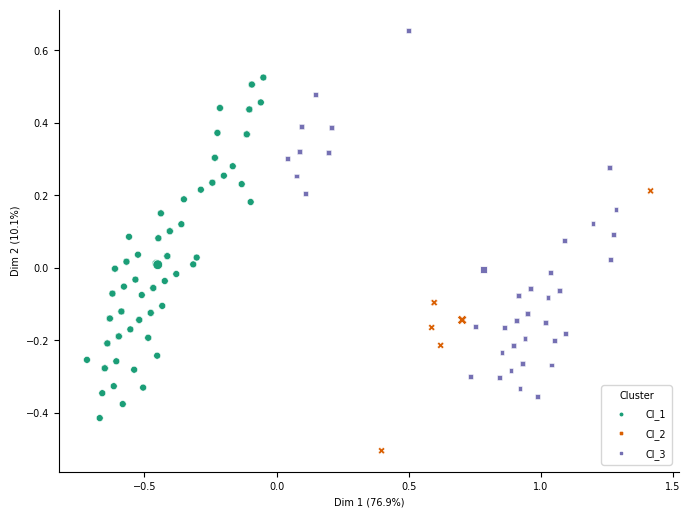

In [32]:
display_results_evidential(X, wecm_models, numeric_labels, up_low_appr=False)

# Weighted FCM - Keller et al. 2000

In [21]:
%%capture
keller_models = np.array([])
w0 = np.ones((c, X.shape[1])) / X.shape[1]
for i in range(10):
    model = fcm_keller2000(X, c=c, verbose=True, init="None", epsilon=1e-6)
    keller_models = np.append(keller_models, model)
keller_models = sorted(keller_models, key=lambda model: model['obj_func'])

J values: [6.743877633680332e-96, 6.187307373454196e-95, 2.401704070426197e-75, 9.992406460944811e-74, 9.160851670885996e-69, 1.1580694660269605e-66, 3.7252507338356674e-50, 1.29403353064407e-41, 1.8048439315514243e-34, 1.0232638468853848e-28]
ARI values: [0.31286729955204867, 0.31286729955204867, 0.5020571148398068, 0.4354679248089005, 0.5020571148398068, 0.31286729955204867, 0.4354679248089005, 0.5020571148398068, 0.31286729955204867, 0.5020571148398068]
NMI values: [0.39991402258714354, 0.39991402258714354, 0.596539492396706, 0.5297886979701691, 0.596539492396706, 0.39991402258714354, 0.5297886979701691, 0.596539492396706, 0.39991402258714354, 0.5965394923967061]


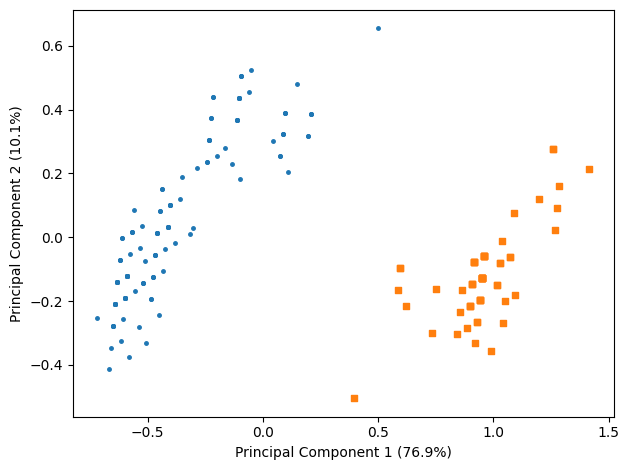

In [22]:
display_results_fuzzy_partition(X, keller_models, numeric_labels)

# Weighted FCM Wang 2004

In [45]:
%%capture
wang_models = np.array([])
for i in range(2):
    model = fcm_wang2004(X, c, w_beta=1.3, verbose=True, init="None", epsilon=1e-5)
    wang_models = np.append(wang_models, model)
wang_models = sorted(wang_models, key=lambda model: model['obj_func'])

J values: [0.4941724881110874, 0.4941726024914192]
ARI values: [0.4654336067506884, 0.4654336067506884]
NMI values: [0.4970895925681511, 0.4970895925681511]


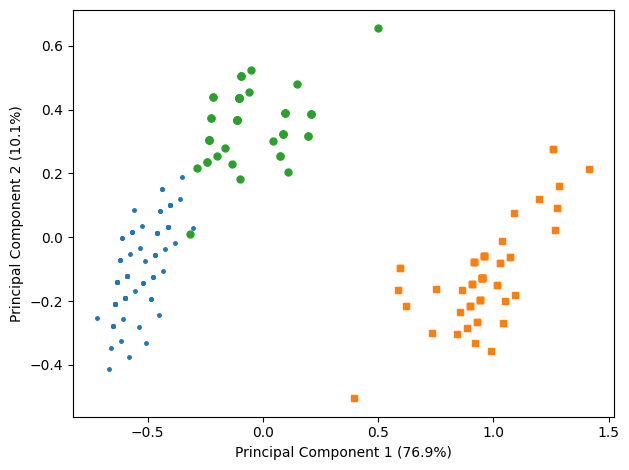

In [46]:
display_results_fuzzy_partition(X, wang_models, numeric_labels)

# SCAD1

In [35]:
%%capture
scad1_models = np.array([])
for i in range(10):
    model = scad1(X, c, verbose=True, K=4, init="None", epsilon=1e-5)
    scad1_models = np.append(scad1_models, model)
scad1_models = sorted(scad1_models, key=lambda model: model['obj_func'])


J values: [12.055198810295167, 12.055201410256418, 12.055201500922745, 12.055215496387314, 12.055216039916235, 12.055216065874301, 12.055218018972957, 12.055218422350544, 12.05521913440609, 12.055220107259602]
ARI values: [0.4749156631589445, 0.4749156631589445, 0.4749156631589445, 0.4749156631589445, 0.4749156631589445, 0.4749156631589445, 0.4749156631589445, 0.4749156631589445, 0.4749156631589445, 0.4749156631589445]
NMI values: [0.5179004971075571, 0.5179004971075571, 0.5179004971075571, 0.5179004971075571, 0.5179004971075571, 0.5179004971075571, 0.5179004971075571, 0.5179004971075571, 0.5179004971075571, 0.5179004971075571]


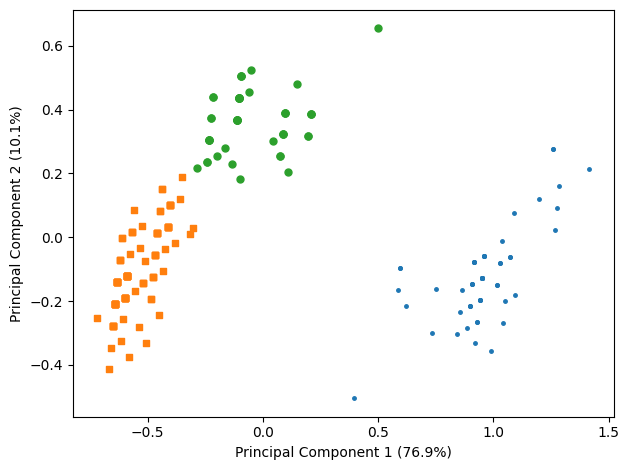

In [36]:
display_results_fuzzy_partition(X, scad1_models, numeric_labels)

# SCAD2

In [39]:
%%capture
scad2_models = np.array([])
for i in range(10):
    model = scad2(X, c, verbose=True, init="None", epsilon=1e-6)
    scad2_models = np.append(scad2_models, model)
scad2_models = sorted(scad2_models, key=lambda model: model['obj_func'])


J values: [5.398019191208849e-28, 5.344576054961429e-22, 1.0937726077925758e-20, 8.013661278894138e-19, 1.568053199531647e-18, 2.561059742515448e-18, 5.186922551232172e-17, 4.4235974780689036e-16, 1.9405345628857543e-14, 5.318105430015359e-14]
ARI values: [0.31286729955204867, 0.31286729955204867, 0.31286729955204867, 0.31286729955204867, 0.33601735894710594, 0.31286729955204867, 0.31286729955204867, 0.31286729955204867, 0.4246048794516272, 0.31286729955204867]
NMI values: [0.39991402258714354, 0.39991402258714354, 0.39991402258714354, 0.39991402258714354, 0.4228719918366858, 0.39991402258714354, 0.39991402258714354, 0.39991402258714354, 0.5113576497021148, 0.39991402258714354]


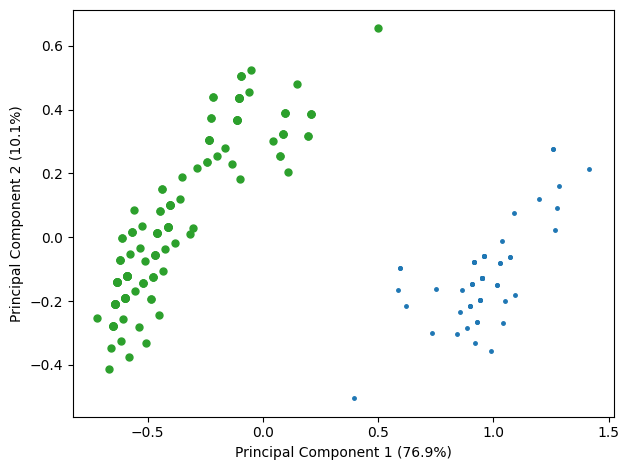

In [40]:
display_results_fuzzy_partition(X, scad2_models, numeric_labels)

# IFWFCM - Xing et al. 2014

In [41]:
%%capture
ifwfcm_models = np.array([])
for i in range(10):
    model = ifwfcm_xing2014(X, c, verbose=True, init="None", epsilon=1e-5)
    ifwfcm_models = np.append(ifwfcm_models, model)
ifwfcm_models = sorted(ifwfcm_models, key=lambda model: model['obj_func'])

J values: [0.31140480607919657, 0.31159935713947495, 0.31160047956811476, 0.31160058336095275, 0.311601049230694, 0.3116016408771282, 0.31160223306704066, 0.31160264765804824, 0.31160488289804, 0.3116068261379411]
ARI values: [0.613679114713187, 0.613679114713187, 0.613679114713187, 0.613679114713187, 0.613679114713187, 0.613679114713187, 0.613679114713187, 0.613679114713187, 0.613679114713187, 0.613679114713187]
NMI values: [0.6419109467062896, 0.6419109467062896, 0.6419109467062896, 0.6419109467062896, 0.6419109467062896, 0.6419109467062896, 0.6419109467062896, 0.6419109467062896, 0.6419109467062896, 0.6419109467062896]


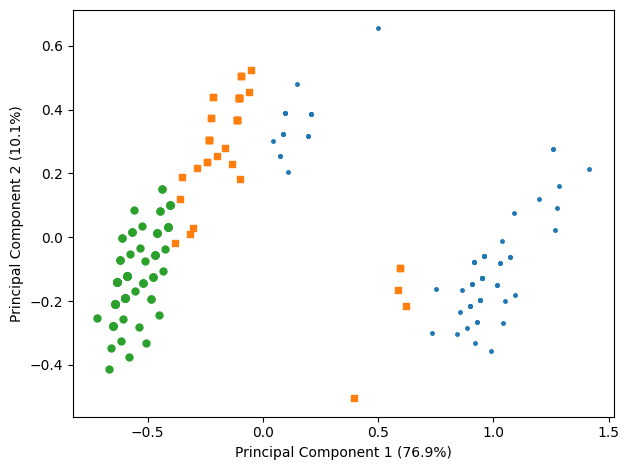

In [42]:
display_results_fuzzy_partition(X, ifwfcm_models, numeric_labels)

# IFWFCM_KD Xing 2014

In [43]:
%%capture
ifwfcm_kd_models = np.array([])
for i in range(10):
    model = ifwfcm_kd_xing2014(X, c, verbose=True, epsilon=1e-6, init="None")
    ifwfcm_kd_models = np.append(ifwfcm_kd_models, model)
ifwfcm_kd_models = sorted(ifwfcm_kd_models, key=lambda model: model['obj_func'])

J values: [0.5813354764182184, 0.5813358812020264, 0.5813362175149809, 0.5813362462161663, 0.5813363636372555, 0.581336536200042, 0.5813365600525501, 0.5813365853995981, 0.5813366164678733, 0.5813367049337712]
ARI values: [0.7144229890829897, 0.7144229890829897, 0.7144229890829897, 0.7144229890829897, 0.7144229890829897, 0.7144229890829897, 0.7144229890829897, 0.7144229890829897, 0.7144229890829897, 0.7144229890829897]
NMI values: [0.7023646838853821, 0.702364683885382, 0.7023646838853821, 0.7023646838853821, 0.7023646838853821, 0.7023646838853821, 0.702364683885382, 0.7023646838853821, 0.7023646838853821, 0.7023646838853821]


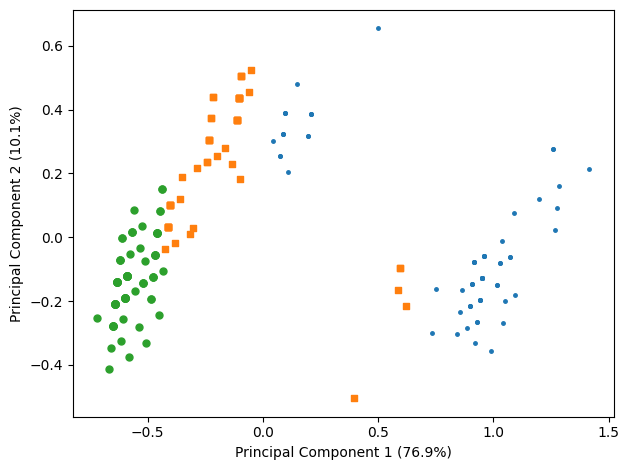

In [44]:
display_results_fuzzy_partition(X, ifwfcm_kd_models, numeric_labels)